## Exercise 1:

Plotting some Planck curves...

C:\Users\fabia\AppData\Local\Temp/ipykernel_5640/45764475.py:23: RuntimeWarning: divide by zero encountered in true_divide
  freq_to_wl = lambda nu: c.to_value()/nu
C:\Users\fabia\AppData\Local\Temp/ipykernel_5640/45764475.py:47: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("../ps3_01_planck_curve.png", tight_layout=True)


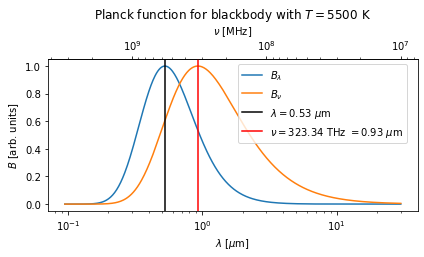

In [58]:
from astropy.constants import h, k_B, c
from astropy.units import K, Hz
import matplotlib.pyplot as plt
import numpy as np


def planck_for_freq(nu, T=5500*K):
    frac = (2*h*nu**3)/(c**2)
    denom = np.exp(h*nu/(k_B * T)) - 1
    return frac * 1 / denom

def planck_for_wavelength(lam, T=5500*K):
    frac = (2*h*c**2)/(lam**5)
    denom = np.exp(h*c/(lam*k_B * T)) - 1
    return frac * 1 / denom

def calc_wien_lambda(T=5500):
    return 0.00289777/T

def calc_wien_nu(T=5500):
    return 58.789e9*T

freq_to_wl = lambda nu: c.to_value()/nu
wl_to_freq = lambda lam: c.to_value()/lam 

nu_data = np.logspace(13, 15.5, 500)*Hz
lambda_data = c/nu_data

b_nu = planck_for_freq(nu_data)
b_lambda = planck_for_wavelength(lambda_data)
b_nu = b_nu/b_nu.max()
b_lambda= b_lambda/b_lambda.max()

fig, ax = plt.subplots()
ax.set_xscale("log")
ax.plot(lambda_data*1e6, b_lambda, label=r"$B_\lambda$")
ax2 = ax.secondary_xaxis('top', functions=(wl_to_freq, freq_to_wl))
ax2.set_xlabel(r"$\nu$ [MHz]")
ax.plot(lambda_data*1e6, b_nu, label=r"$B_\nu$")
ax.set_xlabel(r"$\lambda$ [$\mu$m]")
ax.set_ylabel("$B$ [arb. units]")
ax.axvline(calc_wien_lambda()*1e6, color="k", label=f"$\lambda={calc_wien_lambda()*1e6:.2f}$ $\mu$m")
ax.axvline(freq_to_wl(calc_wien_nu())*1e6, color="r", label=f"$\\nu={calc_wien_nu()*1e-12:.2f}$ THz $={freq_to_wl(calc_wien_nu())*1e6:.2f}$ $\mu$m")
fig.legend(loc=2, bbox_to_anchor=(0.5,1), bbox_transform=ax.transAxes)
ax.set_title("Planck function for blackbody with $T=5500$ K")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig("../ps3_01_planck_curve.png", tight_layout=True)

## Exercise 2

In [32]:
from astropy.units import R_sun, M_sun, yr, km
from astropy.constants import G, sigma_sb, c
import numpy as np
import pandas as pd


def disc_lumin(m, m_dot, r_min, unit="L_sun"):
    return (G*m*m_dot/(r_min*R_sun)/2*M_sun*M_sun/yr).to_value(unit)

def highest_temp(m, m_dot, r):
    return ((G*m*M_sun*m_dot*M_sun/yr/(r*R_sun)**3/sigma_sb/8/np.pi)**(1/4)).to_value("K")

def accretion_lumin(m_dot, eta=1/16):
    return (eta*m_dot*M_sun/yr*c**2).to_value("L_sun")
    

masses = np.array([1, 0.85, 1.4])
radii = np.array([2, 0.01, 10*km/R_sun])
acc_rates = np.array([1e-8, 1e-10, 2e-9])
names = ["T Tauri", "White dwarf", "Neutron star"]
df = pd.DataFrame(np.array([names, masses, radii, acc_rates]).T, columns=["Name", "Mass", "Radius", "Accretion rate"])
df["L_L_sun"] = df.apply(lambda x: disc_lumin(x["Mass"], x["Accretion rate"], x["Radius"]), 1)
df["L_ergs_per_sec"] = df.apply(lambda x: disc_lumin(x["Mass"], x["Accretion rate"], x["Radius"], unit="erg/s"), 1)
df["T"] = df.apply(lambda x: highest_temp(x["Mass"], x["Accretion rate"], x["Radius"]), 1)
L_ACC = accretion_lumin(1e-10)
print(f"The Black hole luminosity is ${L_ACC} L_\\odot$")
df["L_ACC"] = df["L_L_sun"]/L_ACC
df["Obs_WL [nm]"] = 2.89777e-3 / df["T"] * 1e9
df.head()
good_cols = ["Name",  "L_L_sun", "L_ergs_per_sec", "L_ACC", "Obs_WL [nm]"]
new_names = ["Type", "$L$ [$L_\odot$]", "$L$ [ergs/s]", r"$L/L_\tx{acc}$", r"$\lambda_\tx{obs}$"]
print(df[good_cols].to_latex(index=False, header=new_names, escape=False, formatters={"L_ergs_per_sec": lambda s: f"{s:.4g}"}))

The Black hole luminosity is $92.45947803515024 L_\odot$
\begin{tabular}{lrrrr}
\toprule
        Type & $L$ [$L_\odot$] & $L$ [ergs/s] & $L/L_\tx{acc}$ & $\lambda_\tx{obs}$ \\
\midrule
     T Tauri &        0.078498 &    3.005e+32 &       0.000849 &        1341.335491 \\
 White dwarf &        0.133447 &    5.108e+32 &       0.001443 &          83.063493 \\
Neutron star &     3058.226758 &    1.171e+37 &      33.076401 &           0.255952 \\
\bottomrule
\end{tabular}



## Exercise 4

Cloud free-fall time

In [66]:
from astropy.constants import G
from astropy.units import g, cm

def t_ff(rho_0):
    return np.sqrt(3*np.pi/(32*G*rho_0))

rho_0_cloud = 4e-23*g/cm**3

print(f"The free-fall time of the cloud is {t_ff(rho_0_cloud).to_value(unit='Myr'):.2f} Myr.")

The free-fall time of the cloud is 10.53 Myr.


## Exercise 5

In [7]:
M_0 = 0.1
M_1 = 20
ALPHA = 2.35
M_TOT = 1e3

def calculate_const(m_0=M_0, m_1=M_1, m_tot=M_TOT):
    exponent = (2-ALPHA)
    return exponent*m_tot/(m_1**exponent - m_0**exponent)

A = calculate_const()

def calculate_luminosity(m_0=M_0, m_1=M_1):
    """Return the initial luminosity according to IMF"""
    exponent = (5-ALPHA)
    return A/exponent*(m_1**exponent - m_0**exponent)


def calculate_number(m_0=M_0, m_1=M_1):
    """Return the initial luminosity according to IMF"""
    exponent = (1-ALPHA)
    return A/exponent*(m_1**exponent - m_0**exponent)

L_TOT = calculate_luminosity()
L_MASSIVE = calculate_luminosity(m_0=5)
L_FRAC = L_MASSIVE/L_TOT
print(f"Normalization constant w. r. t. mass: {A}")
print(f"Total luminosity: $L={L_TOT:.3g} L_\\odot$")
print(f"Fraction of luminosity of stars with $m>5M_\\odot$: $\\eta={L_FRAC:.2f}$")
N_TOT = calculate_number()
print(f"The total number of sources is around $N={N_TOT:.1f}$")
N_MASSIVE = calculate_number(m_0=5)
print(f"N massive = {N_MASSIVE:.1f}")
print(f"The fraction of sources more massive than 5 solar masses is around $N={N_MASSIVE/N_TOT:.4f}$")
print(f"The mean mass is {M_TOT/N_TOT:.2f} solar masses")
L_AGED = calculate_luminosity(m_1=3.16)
print(f"L of aged cluster = {L_AGED:.1f}")
print(f"After 1 Gyr with m_max=3.16, {L_AGED/L_TOT*100:.2f} %")


Normalization constant w. r. t. mass: 185.35580124054704
Total luminosity: $L=1.96e+05 L_\odot$
Fraction of luminosity of stars with $m>5M_\odot$: $\eta=0.97$
The total number of sources is around $N=3071.4$
N massive = 13.2
The fraction of sources more massive than 5 solar masses is around $N=0.0043$
The mean mass is 0.33 solar masses
L of aged cluster = 1475.3
After 1 Gyr with m_max=3.16, 0.75 %
